In [1]:
 # Install the scikeras library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers

## **importing dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dataset= '/content/drive/MyDrive/MalGAN/Datasets'


In [4]:
import os
print(os.listdir(dataset))

['8_family_training.csv', '8_family_testing.csv', '8_family_validation.csv']


In [5]:
# Paths to the datasets
train_path = os.path.join(dataset, '8_family_training.csv')
test_path = os.path.join(dataset, '8_family_testing.csv')
validation_path = os.path.join(dataset, '8_family_validation.csv')



In [6]:
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)
data_validation = pd.read_csv(validation_path)

In [7]:
data_train.head()

,Malware,Executable_name,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,Benign,Benign_3071,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Benign,Benign_2017,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qbot,backdoor_qbot_2020_124,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,emotet,spyware_emotet_2019_223,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Benign,Benign_2048,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
count=data_train['Malware'].value_counts()
print(count)

Malware
Benign    1019
qbot       509
fareit     486
shade      310
emotet     298
ursnif     254
gozi       158
banbra     150
tofsee     105
Name: count, dtype: int64


In [9]:
count_test=data_test['Malware'].value_counts()
print(count_test)

Malware
Benign    127
qbot       64
fareit     60
shade      39
emotet     37
ursnif     31
gozi       20
banbra     18
tofsee     13
Name: count, dtype: int64


In [10]:
count_validation=data_validation['Malware'].value_counts()
print(count_validation)

Malware
Benign    128
qbot       64
fareit     61
shade      39
emotet     38
ursnif     32
gozi       20
banbra     19
tofsee     13
Name: count, dtype: int64


In [23]:
X_train = data_train.drop(['Malware', 'Executable_name'], axis=1)
y_trian = data_train['Malware']

In [24]:
X_validation=data_validation.drop(['Malware','Executable_name'],axis=1)
y_validation=data_validation['Malware']

In [25]:
print(X_train.shape);

print(X_validation.shape);


(3289, 6005)
(414, 6005)


In [26]:
X_train.head()

,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,NtQuerySystemInformation,NtFreeVirtualMemory,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,11.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,89.0,1030.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,120.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,61.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Preprocessing**

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

lable = LabelEncoder()


for i in X_train.columns:
  if X_train[i].dtype == 'object':
    X_train[i] = lable.fit_transform(X_train[i])

In [28]:
X_train.head()

,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,NtQuerySystemInformation,NtFreeVirtualMemory,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,11.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,89.0,1030.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,120.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,61.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
feature_names = list(X_train.columns)

In [30]:
for k in X_validation.columns:
  if X_validation[k].dtype == 'object':
    X_validation[k] = lable.fit_transform(X_validation[k])

In [31]:
y_train=lable.fit_transform(y_trian)
y_validation=lable.fit_transform(y_validation)

In [32]:
label_mapping_train = dict(zip(range(len(lable.classes_)), lable.classes_))


# Display the mapping
print("Label Mapping:", label_mapping_train)

Label Mapping: {0: 'Benign', 1: 'banbra', 2: 'emotet', 3: 'fareit', 4: 'gozi', 5: 'qbot', 6: 'shade', 7: 'tofsee', 8: 'ursnif'}


In [33]:
class_name=['Benign', 'banbra', 'emotet', 'fareit', 'gozi', 'qbot', 'shade', 'tofsee', 'ursnif']

In [34]:
stdScale=StandardScaler()
X_train=stdScale.fit_transform(X_train)
X_validation=stdScale.fit_transform(X_validation)

In [35]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)

## **1DCNN**

In [36]:
def CNN(filters=32, kernel_size=3, activation='relu', optimizer='adam', Dropout=0.5):
    model = keras.Sequential()
    model.add(layers.Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=64, kernel_size=kernel_size, activation=activation))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(Dropout))
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))  # Adjust based on number of classes

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

##**Parameters value for best accuracy:-**

Best Filters: 80

Best Kernel Size: 3

Best Dropout Rate: 0.2

Best Activation: relu

Best Optimizer: rmsprop  

In [37]:
CNN_model=CNN(filters=80,
    kernel_size=3,
    Dropout=0.2,
    activation='relu',
    optimizer='rmsprop')
Train=CNN_model.fit(X_train, y_train, epochs=25, validation_data=(X_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 85s 810ms/step - accuracy: 0.8101 - loss: 0.6878 - val_accuracy: 0.9589 - val_loss: 0.1780
Epoch 2/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 96s 934ms/step - accuracy: 0.9569 - loss: 0.1626 - val_accuracy: 0.9710 - val_loss: 0.1343
Epoch 3/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 130s 818ms/step - accuracy: 0.9748 - loss: 0.0971 - val_accuracy: 0.9734 - val_loss: 0.1523
Epoch 4/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 142s 813ms/step - accuracy: 0.9810 - loss: 0.0665 - val_accuracy: 0.9734 - val_loss: 0.1619
Epoch 5/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 145s 850ms/step - accuracy: 0.9823 - loss: 0.0515 - val_accuracy: 0.9734 - val_loss: 0.2216
Epoch 6/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 149s 920ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9783 - val_loss: 0.1720
Epoch 7/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 86s 835ms/step - accuracy: 0.9837 - loss: 0.0498 - val_accuracy: 0.9831 - val_loss: 0.1621
Epoch 8/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 142s 839ms/step - accuracy: 0.9870 - lo

In [41]:
val_accuracy = CNN_model.evaluate(X_validation, y_validation)
print("Validation accuracy=", val_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - accuracy: 0.9822 - loss: 0.1557
Validation accuracy= [0.20780101418495178, 0.9806763529777527]


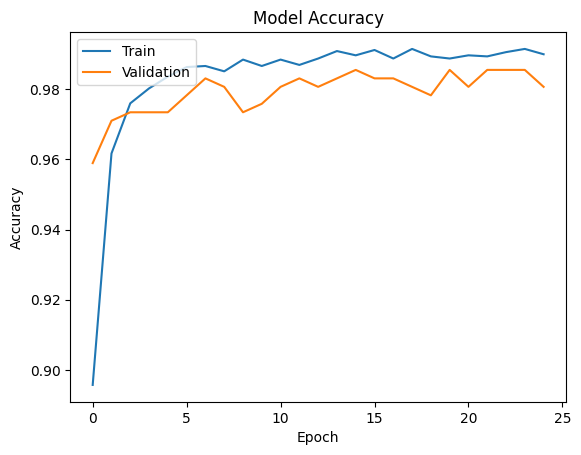

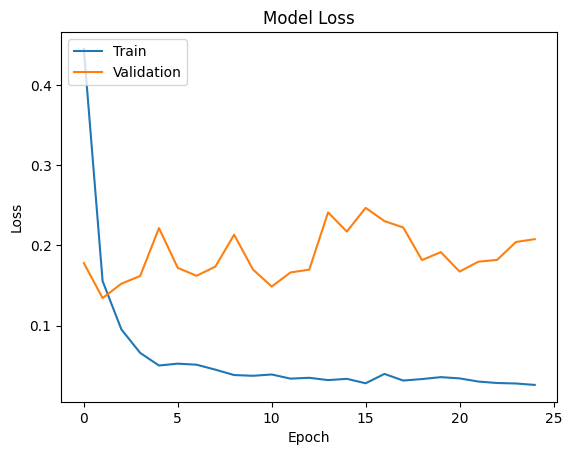

In [42]:
# prompt: plot learning curve

import matplotlib.pyplot as plt

plt.plot(Train.history['accuracy'])
plt.plot(Train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(Train.history['loss'])
plt.plot(Train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

0: 'Benign', 1: 'banbra', 2: 'emotet', 3: 'fareit', 4: 'gozi', 5: 'qbot', 6: 'shade', 7: 'tofsee', 8: 'ursnif'

In [43]:
# Save the model in .keras format
CNN_model.save('/content/drive/MyDrive/MalGAN/model.keras')
